<a href="https://colab.research.google.com/github/pias97/Machine_Learning-Logistic-Regression/blob/main/Logistic%20Regression_288.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Import


In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import random

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

X_list = X.tolist()
Y_list = y.tolist()

#Data Preprocessing

In [ ]:
Train_x=[]
Train_y=[]
Val_x=[]
Val_y=[]
Test_x=[]
Test_y=[]

for i in range(len(X_list)):
  X_list[i].insert(0, 1)

for i in range(len(X_list)):
  R = random.uniform(0, 1)
  if R>=0 and R<=0.7:
    Train_x.append(X_list[i])
    Train_y.append(Y_list[i])
  elif R>0.7 and R<=0.85:
    Val_x.append(X_list[i])
    Val_y.append(Y_list[i])
  else:
    Test_x.append(X_list[i])
    Test_y.append(Y_list[i])


print(len(Train_x))
print(len(Val_x))
print(len(Test_x))



103
28
19


#Training Set

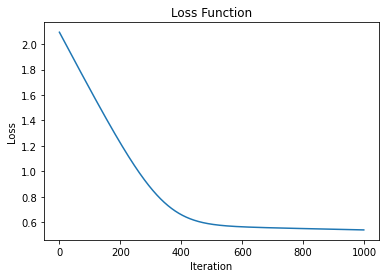

[ 0.43970707  0.22890378 -0.32505574]


In [ ]:
G_train_X=[]
G_Train_Y=[]
Train_x_array = np.array(Train_x)
Train_y_array = np.array(Train_y)

Theta = [0.6,0.9,0.3]
lr = 0.00001

for i in range(1000):
  Tot_loss = 0
  for j in range(len(Train_x)):
    z = np.dot(Train_x_array[j],Theta)
    h =  1/(1 + np.exp(-z))
    loss = (-Train_y_array[j]*np.log(h))-((1-Train_y_array[j])*np.log(1-h))
    Tot_loss = Tot_loss + loss
    dv = Train_x_array[j]*(h-Train_y_array[j])
    Theta = Theta - (dv*lr)

  Tot_loss = Tot_loss/len(Train_x)

  G_Train_Y.append(Tot_loss)
  G_train_X.append(i)

#Graph
plt.plot(G_train_X,G_Train_Y)
plt.title("Loss Function")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

print(Theta)

#Validation Set

In [ ]:
G_val_X=[]
G_val_Y=[]

Val_x_array = np.array(Val_x)
Val_y_array = np.array(Val_y)

correct = 0
for i in range(len(Val_x)):
  z = np.dot(Val_x_array[i],Theta)
  h =  1/(1 + np.exp(-z))
  if h>=0.5:
    h=1
  else:
    h=0

  if h==Val_y_array[i]:
    correct = correct+1



Val_acc = (correct/len(Val_x))*100
print('Val_acc = ',Val_acc)


"""
#Graph
plt.plot(G_val_X,G_val_Y)
plt.title("Accuracy Measurement")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()
"""

Val_acc =  67.85714285714286


'\n#Graph\nplt.plot(G_val_X,G_val_Y)\nplt.title("Accuracy Measurement")\nplt.xlabel("Iteration")\nplt.ylabel("Accuracy")\nplt.show()\n'

#Test Set

In [ ]:
G_test_X=[]
G_test_Y=[]

Test_x_array = np.array(Test_x)
Test_y_array = np.array(Test_y)
correct = 0

for i in range(len(Test_x)):
  z = np.dot(Test_x_array[i],Theta)
  h =  1/(1 + np.exp(-z))
  if h>=0.5:
    h=1
  else:
    h=0

  if h==Test_y_array[i]:
    correct = correct+1
    
    G_test_X.append(i)
    G_test_Y.append(correct)

Test_acc = (correct/len(Test_x))*100
print('Test_acc = ',Test_acc)


"""
#Graph
plt.plot(G_val_X,G_val_Y)
plt.title("Accuracy Measurement")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()
"""

Test_acc =  68.42105263157895


'\n#Graph\nplt.plot(G_val_X,G_val_Y)\nplt.title("Accuracy Measurement")\nplt.xlabel("Iteration")\nplt.ylabel("Accuracy")\nplt.show()\n'